<a href="https://colab.research.google.com/github/JoaoPariss/MODULO-40---SVM/blob/main/MOD40_EXERCICIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 40 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já conhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [ ]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [ ]:
# Carregamento da Base
df = pd.read_csv('CARRO_CLIENTES.csv')
df.head(5)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [ ]:
# Verificação de Tipo de Dados
df.dtypes

,0
User ID,int64
Gender,object
Age,int64
AnnualSalary,int64
Purchased,int64


In [ ]:
# Verificação de Valores Nulos
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
AnnualSalary,0
Purchased,0


In [ ]:
# Exclusão da Variável User ID
df = df.drop('User ID', axis=1)
df.head(5)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [ ]:
# Codificação da Coluna Gender
label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df.head(5)

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

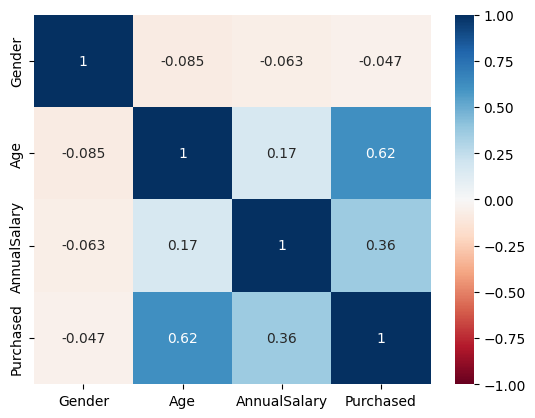

In [ ]:
# Matriz de Correlação
sns.heatmap(df.corr(), annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1)
plt.show()

Observa-se que a variável mais correlacionada à coluna target, Purchased, é a idade, Age. Correlação = 0,62.

A coluna AnnualSalary também apresenta uma correlação positiva com Purchased, 0,36.

Já a coluna de gênero apresenta uma pequena correlação negativa (-0,047) com a variável target, e com as demais variáveis da base.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [ ]:
# Separação da Base e X e Y
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [ ]:
# Separação da Base em Treino e Teste
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.2, random_state=42)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [ ]:
# Modelagem e Treinamento do Modelo
svm_lin = SVC(kernel='linear', random_state=42, C=1.0)
svm_lin.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [ ]:
# Realização das Previsões
y_pred = svm_lin.predict(X_test)

In [ ]:
# Avaliação do Modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.81
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       112
           1       0.85      0.69      0.76        88

    accuracy                           0.81       200
   macro avg       0.82      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200

[[101  11]
 [ 27  61]]


O modelo apresentou boa performance geral, com 81% de acurácia, destacando-se na identificação da classe 0 (recall de 90%) e uma precisão equilibrada entre as classes. Porém, deixou a desejar na detecção da classe 1 (recall de 69%), o que indica certa dificuldade em identificar corretamente todos os positivos.

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [ ]:
# Modelagem e Treinamento do Modelo
svm_poly = SVC(kernel='poly', random_state=42, C=1.0)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [ ]:
# Realização das Previsões
y_pred = svm_poly.predict(X_test)

In [ ]:
# Avaliação do Modelo
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.7
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       112
           1       0.89      0.36      0.52        88

    accuracy                           0.70       200
   macro avg       0.77      0.66      0.65       200
weighted avg       0.76      0.70      0.67       200

[[108   4]
 [ 56  32]]


O modelo polinomial obteve 70% de acurácia, com ótimo desempenho na identificação da classe 0 (96% de recall), mas apresentou baixa capacidade de identificar a classe 1 (36% de recall), ou seja, acertou a maioria dos negativos, mas deixou passar muitos positivos, o que pode indicar um viés para a classe majoritária.

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

O modelo SVM com kernel linear, com acurácia de 0.81, obteve um desempenho superior ao modelo com kernel poly, com acurácia de 0.7.  Além de maior acurácia, observa-se que o modelo poly obteve um recall muito baixo para a classe, 0.36, demonstrando incapacidade para generalizar os positivos.

Agora, comparando o modelo SVM com kernel linear e o modelo de XGBoost, pode-se observar que o XGBoost obteve uma perfomance superior. Tanto na acurácia, 0.905, contra 0.81, quanto no recall da classe 1, 0.86 contra 0.69. O modelo com XGBoost não apenas acertou mais no geral, como também reduziu os falsos negativos e teve um desempenho mais consistente.